<a href="https://colab.research.google.com/github/khipucode/data_and_codes_phd/blob/main/4_resultados_teoricos_comparacao_com_experimentos_avaliacao_SD_AV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math as mt
import math
import numpy as np     # library for vector operation
from mpmath import *   # library for bessel function
import matplotlib.pyplot as plt
from google.colab import files
import csv


# Parâmetros dos moduladores
Vpi_pm1  = 3
Vpi_mz1  = 4 # 2.4
pi = 3.1416
#---------------------------Driving voltage ------------------------------------
#----------PM --------- Potências de entrada em dBm nas portas dos moduladores
Ppm1     = 28.91   ;  Apm1  = pi*10**((Ppm1-10)/20)/Vpi_pm1     ;   Vpm1   =  Vpi_pm1*Apm1/pi   ; ang1pm = 0   ;  Upm1   =  0       ;     Tpm1  =  (pi*Upm1/Vpi_pm1);
#---------MZM --------
Pmz1a    = 22.3  ;  Amz1a   = pi*10**((Pmz1a-10)/20)/Vpi_mz1  ;   V1a   =  Vpi_mz1*Amz1a/pi   ;  ang1a  = 0  ;  Umz1a  = Vpi_mz1/2 ;    Th1a  =  (pi*Umz1a/Vpi_mz1);
Pmz1b    = 23.9  ;   Amz1b   = pi*10**((Pmz1b-10)/20)/Vpi_mz1 ;   V1b   =  Vpi_mz1*Amz1b/pi   ;  ang1b  = 0  ;  Umz1b  =  0;            Th1b  =  (pi*Umz1b/Vpi_mz1);

'''
# Condição de planicidade - Usar para encontrar um pente plano a partir da potência maior entre os dois braços
Amz1b  = Amz1a + pi/2;
V1b    = Vpi_mz1*Amz1b/pi
Pmz1b  = 10*mt.log10(10*V1b**2)
'''

# --------------- Simulações usando A_x -------------------
Apm1   = 8.49
Amz1a  = 8.64 #4.97 #
Amz1b  = 11.78 #6.54 #
Vpm1  = Vpi_pm1*Apm1/pi ; Ppm1  = 10*mt.log10(10*Vpm1**2)
V1a   = Vpi_mz1*Amz1a/pi ; Pmz1a  = 10*mt.log10(10*V1a**2)
V1b   = Vpi_mz1*Amz1b/pi ; Pmz1b  = 10*mt.log10(10*V1b**2)
# --------------- Simulações usando A_x -------------------


# Dados usados
print('-----------------Dados usados ------------------')
print('Ppm1         =',round(Ppm1,2), '  Apm1  =', round(Apm1,2))
print('Pmz1a        =',round(Pmz1a,2),' Amz1a =', round(Amz1a,2))
print('Pmz1b        =',round(Pmz1b,2) ,' Amz1b =', round(Amz1b,2))
print('Diferença Ax =', round(Amz1b - Amz1a,2))

# ==============================================================================



#if P_cw is inside the MZ vector, this will multiply the number of times there are MZs, so P_cw should use
P_cw    = 1
#num_mzm = 2
#P_cw    = P_cw**(1/3)

#----------------------------TESTING VALUES------------------------------------
up_n  =  39   # number of generated SLs for PM
up_m  =  61   # number of generated SLs for MZ

noise = 10**-7; noise_dBm = 10*log10(noise)



-----------------Dados usados ------------------
Ppm1         = 28.18   Apm1  = 8.49
Pmz1a        = 30.83  Amz1a = 8.64
Pmz1b        = 33.52  Amz1b = 11.78
Diferença Ax = 3.14


In [2]:
#===============================================================================
#--------------------------- Preenchimento do vector PM
top_n = int((up_n-1)/2)
ind_n = range(-top_n,top_n+1)

Vector_pm = []
for n in ind_n:
  J_n_Apm = besselj(n,Apm1)
  Vector_pm.append(J_n_Apm)

#---------------------------- Preenchimento do vector MZ
top_m = int((up_m-1)/2)
ind_m = range(-top_m,top_m+1)


Vector_mz = []
for m in ind_m:
   J_m_Amz1a = besselj(m,Amz1a)
   J_m_Amz1b = besselj(m,Amz1b)
   temp = P_cw*0.5*J_m_Amz1a*exp(j*(m*ang1a + Th1a)) + P_cw*0.5*J_m_Amz1b*exp(j*(m*ang1b + Th1b))
   Vector_mz.append(temp)


# MZM transfer function :
# https://webdemo.inue.uni-stuttgart.de/webdemos/02_lectures/uebertragungstechnik_2/mach_zehnder_modulator/index.php?id=1
#-------------------------------------------------------------------------------
# Função principal que faz o produto cruzado de 2 campos eletricos, usando como
# dados de entrada os tamanhos dos vectores e vectores de campos eletricos
# que estão interagindo

def crossprod_efield(up_1, Vector_1, up_2, Vector_2):
 up_vre = up_1 + up_2 - 1    # limite do vetor resultante
 #ax_crossprod_vector = []   # dominio do vetor resultante
 #top_k = int((up_vre-1)/2)
 #ax_crossprod_vector = range(-top_k,top_k+1)
 Matrix_cross_efield = np.zeros((up_1, up_vre), dtype=complex) # Tamanho da matrix
 t = 0
 k = 0
 # -------------------- begin for
 for j in range(up_1):
  temp1 = Vector_1[j]
  for i in range(up_2):
    temp2 = Vector_2[i]
    temp3 = temp1*temp2
    k     = i + t
    Matrix_cross_efield[j][k] = temp3
 #print('\n')
  t = j+1
 # -------------------- end for
 #Vector_EFre  Electric Field Resultant
 Vector_EFre= np.sum(Matrix_cross_efield, axis=0) #soma das colunas de campos E
 temp2 = [abs(kt) for kt in Vector_EFre]
 #print(Vector_EFre)
 Vector_Ire = np.square(temp2)  # Intensity_resultant
 #Vector_Ire = np.square(abs(Vector_EFre))  # Intensity_resultant # it doesn't work

 return up_vre, Matrix_cross_efield, Vector_EFre, Vector_Ire

#--------------------------end crossprod_efield
#------------------------------------------------------------------------------

def add_noise(up_vec, Vector_Iout_all, noise):
 ax_vector_comb  = []   # dominio do vetor resultante
 top_k = int((up_vec-1)/2)
 ax_vector_comb = range(-top_k,top_k+1)
 Comb_plot     = []    # vector usado para considerar o ruido
 Comb_plot_dBm = []    # vector usado para considerar o ruido en dBm
 for k1 in range(up_vec):
    temp  = Vector_Iout_all[k1]
    if temp < noise:
      Comb_plot.append(0)
      Comb_plot_dBm.append(10*log10(noise))
    else:
      Comb_plot.append(Vector_Iout_all[k1])
      Comb_plot_dBm.append(10*log10(temp))
 return ax_vector_comb,Comb_plot,Comb_plot_dBm

#------------function calculate Intensity and add noise----------------
#  Usa um vetor de campo elétrico e calcula E.^2 e adiciona ruido
def find_Iout_add_noise(up_vec, Vector_efield_all, noise):
 temp2 = [abs(k2) for k2 in Vector_efield_all]
 Vector_Iout_all = np.square(temp2)
 ax_vector_comb  = []   # dominio do vetor resultante
 top_k = int((up_vec-1)/2)
 ax_vector_comb = range(-top_k,top_k+1)
 Comb_plot     = []    # vector usado para considerar o ruido
 Comb_plot_dBm = []    # vector usado para considerar o ruido en dBm
 for k1 in range(up_vec):
    temp  = Vector_Iout_all[k1]
    if temp < noise:
      Comb_plot.append(0)
      Comb_plot_dBm.append(10*log10(noise))
    else:
      Comb_plot.append(Vector_Iout_all[k1])
      Comb_plot_dBm.append(10*log10(temp))

 return ax_vector_comb,Comb_plot,Comb_plot_dBm

# -------------------------------------------------------------------------
# Esta função Reduz o tamanho do vector Comb (que já tem ruido) para um valor
# desejado, neste caso não importa se o vector está em mW ou dBm
# up_vec = tamanho atual, vec_comb = vector_actual, up_new = tamanho requerido

def reduct_vector(up_act, vec_comb, up_new):
 # up_act = tamanho atual do vector vec_comb
 a = int((up_act-up_new)/2)
 b = int(a + up_new)
 c = int((up_new-1)/2)
 ax_rang = range(-c,c+1)
 ax_new_list = list(ax_rang)
 new_vcomb = []
 for k in range(a,b):
  new_vcomb.append(vec_comb[k])

 return ax_new_list, new_vcomb
#--------------------------------------end function
# SAÍDA: lista novo dominio do comb , comb com dominio maior
#----------------------------------------------------------------------------
# Esta função aumenta o  o tamanho do vector Comb (que já tem ruido) para um
# valor desejado  unid = 1 -> em mW  ou otro em dBm, noise = usado no sistema

def increase_vector(up_act, vec_comb, up_new, unid, noise):
 # (ax_new, new_vcomb) = increase_vector(up_act, vec_comb, up_new, unid, noise)
 rg = int((up_new - 1)/2)
 a1 = int((up_new - up_act)/2)
 a2 = int(a1 + up_act)
 ax_rang = range(-rg, rg + 1)
 ax_new = list(ax_rang)
 new_vcomb = []
 t1 = 0
 for k in range(up_new):
  if k < a1  or k > a2-1:
    if unid == 1:
     new_vcomb.append(0)
    else:
     new_vcomb.append(10*math.log10(noise))
  else:
   new_vcomb.append(vec_comb[t1])
   t1 = t1 + 1
 return ax_new, new_vcomb

def ploting_sl2(axrange,namex, comb_dBm, sistem, lim_sup, lim_lat):
    # Cria uma figura e um eixo para o gráfico
    fig, ax = plt.subplots(figsize=(9, 4.5), tight_layout=True)


    # Cria o gráfico stem
    ax.stem(axrange,comb_dBm,
              bottom = noise_dBm,
              use_line_collection = True, linefmt='blue', markerfmt='bo')  #magenta red blue kiwi


    # Define o título do gráfico com o valor da variável sistem
    ax.set_title('Resposta do '+sistem+' em dB', pad=14)

    tam_let  = 18
    # Define os rótulos dos eixos
    ax.set_xlabel('$'+namex+'$', fontsize=tam_let)
    ax.set_ylabel('$10 log(I_{'+sistem+'}/I_{IN})$ (dB)', fontsize=tam_let)
    #ax.set_ylabel('Potência (dBm)', fontsize=tam_let)
    ax.tick_params(axis='both', which='major', labelsize=tam_let)
    ax.grid(True, linestyle='--') # Define as linhas do grid como puntilhadas

    '''
    # Criando um segundo conjunto de eixos que compartilha o mesmo eixo x
    ax2 = ax.twinx()
    # Plotando os dados no eixo secundário
    ax2.set_ylabel('Potência (dBm)', fontsize=tam_let, color='r')
    # Configurando a cor do eixo y para corresponder à cor dos dados
    ax2.tick_params(axis='y', labelcolor='r',which='major', labelsize=tam_let)
    ax2.set_ylim(-72, lim_sup)
    ax2.set_yticks(range(-70, lim_sup+1, 10))
    '''

    ax.set_ylim(-72, lim_sup)
    ax.set_xlim(-lim_lat-0.5, lim_lat + 0.5)
    ax.set_yticks(range(-70, lim_sup+1, 10))

    # Exibe o gráfico
    plt.show()

# analise de SD e AV

def analise_SD_AV(vec_SL, eN):
  up_x = len(vec_SL)  #up_m  Tamanho do Vetor gerado por MSL
  print('Tamanho do vector de saida do EOM :', up_x)
  #Quantidade de SLs avaliadas
  print('eN =', eN)
  ia = int((up_x - eN-2)/2+1)
  ib = int((up_x + eN-2)/2+1)

  #print('Faixa entre inicio e final ia=',ia, 'ib=',ib)
  # Encontramos o vetor central a ser avaliado
  v_analyze = []
  for k in range(ia,ib):
    v_analyze.append(vec_SL[k])

  #print('Fator de variação SLs avaliadas   --:', np.std(v_analyze)/np.mean(v_analyze))
  #print('STD: ', np.std(v_analyze),' Média ',np.mean(v_analyze))
  menor = min(v_analyze)
  men_dB = 10*log10(menor)
  maior = max(v_analyze)
  mai_dB = 10*log10(maior)
  dif  = maior - menor
  dif_dB_1  = mai_dB - men_dB
  # Desvio padrão das SLs avaliadas
  print('SD =', round(np.std(v_analyze), 5))
  #Diferença entre mai e men (dB)
  print('AV =', round(dif_dB_1, 5))

  #PLOTS
  '''
  plt.stem(vec_mz)
  plt.show()
  #plt.stem(Imz_Iin_dBm)
  #plt.show()
  plt.stem(v_analyze)
  plt.show()
  '''
  #plt.stem(v_analyze)
  #plt.show()

In [3]:
def ploting_sl3(axrange,namex, comb, sistem, noise_ref, lim_sup, lim_lat):
    # Cria uma figura e um eixo para o gráfico
    fig, ax = plt.subplots(figsize=(9, 4.5), tight_layout=True)


    # Cria o gráfico stem
    ax.stem(axrange,comb,
              bottom = noise_ref,
              use_line_collection = True, linefmt='blue', markerfmt='bo')  #magenta red blue kiwi


    # Define o título do gráfico com o valor da variável sistem
    ax.set_title('Resposta do '+sistem+' em adimensional', pad=14)

    tam_let  = 18
    # Define os rótulos dos eixos
    ax.set_xlabel('$'+namex+'$', fontsize=tam_let)
    #ax.set_ylabel('$I_{'+sistem+'}/I_{IN}$ ', fontsize=tam_let)
    ax.set_ylabel('$10 log(I_{'+sistem+'}/I_{IN})$ (dB)', fontsize=tam_let)
    #ax.set_ylabel('Potência (dBm)', fontsize=tam_let)
    ax.tick_params(axis='both', which='major', labelsize=tam_let)
    ax.grid(True, linestyle='--') # Define as linhas do grid como puntilhadas

    '''
    # Criando um segundo conjunto de eixos que compartilha o mesmo eixo x
    ax2 = ax.twinx()
    # Plotando os dados no eixo secundário
    ax2.set_ylabel('Potência (dBm)', fontsize=tam_let, color='r')
    # Configurando a cor do eixo y para corresponder à cor dos dados
    ax2.tick_params(axis='y', labelcolor='r',which='major', labelsize=tam_let)
    ax2.set_ylim(-72, lim_sup)
    ax2.set_yticks(range(-70, lim_sup+1, 10))
    '''

    ax.set_ylim(noise_ref, lim_sup)
    ax.set_xlim(-lim_lat-0.5, lim_lat + 0.5)
    #ax.set_yticks(range(noise_ref, lim_sup+1, 10))

    # Exibe o gráfico
    plt.show()

<ipython-input-2-c64d54989591>:148: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(axrange,comb_dBm,


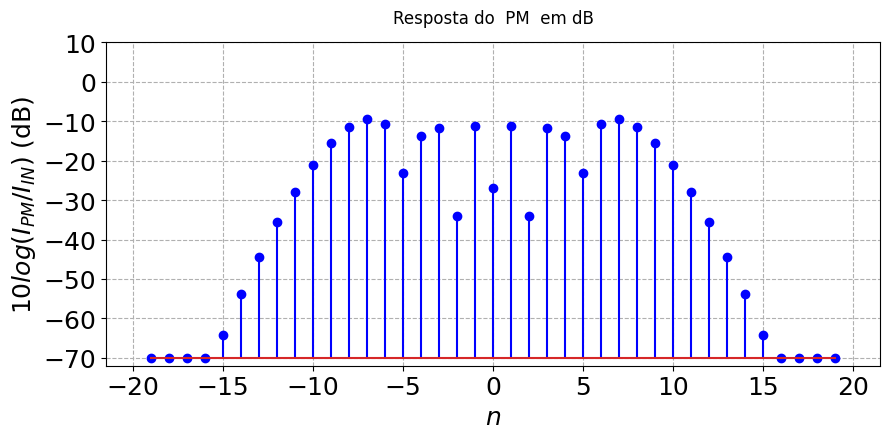

Amz1a and Amz1b 8.64 and 11.78


In [4]:
#-------------- PLOTAR AS SLs GERADAS PELO PM -------------------------
# usa-se a linha onde é gerada os valores do campo eletrico e o tamanho do vector pm
(ax_pm,comb_pm,comb_pm_dBm) = find_Iout_add_noise(up_n, Vector_pm, noise)
sistem1  = ' PM '
name_x   = 'n'
sup_pm  = 10
lat_pm  = 21
ploting_sl2(ax_pm, name_x, comb_pm_dBm,sistem1, sup_pm, lat_pm)
print("Amz1a and Amz1b", Amz1a,"and", Amz1b)

In [5]:
# Pente do PM a ser analisado
vec_SL = comb_pm  # Vetor de intensidade em mW
eN     = 15          # Numero de SLs a ser analisadas
analise_SD_AV(vec_SL, eN)


Tamanho do vector de saida do EOM : 39
eN = 15
SD = 0.03973
AV = 24.70114


<ipython-input-2-c64d54989591>:148: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(axrange,comb_dBm,


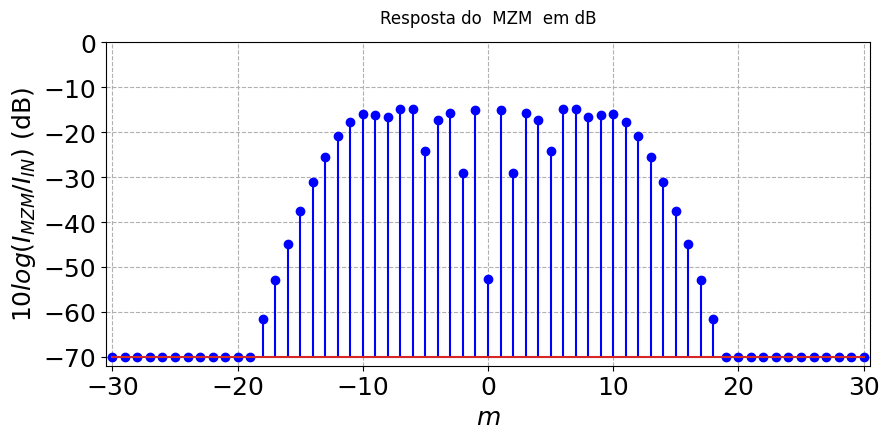

"\n# plota resposta adimensional\nname_x = 'm'\nsup_mz  = 0.04\nlat_mz  = 30\nnoise_ref  = -200\nploting_sl3(ax_mz,name_x, comb_mz_dBm, sistem2, noise_ref, sup_mz, lat_mz)\n\n"

In [6]:
#-------------- PLOTAR AS SLs GERADAS PELO MZM -------------------------
# usa-se a linha onde é gerada os valores do campo eletrico e o tamanho do vector mz
a = 1
# noise  = -200 # usado para plotar limite menor de ruido
(ax_mz,comb_mz,comb_mz_dBm) = find_Iout_add_noise(up_m, Vector_mz, noise)
sistem2 = ' MZM '
name_x = 'm'
sup_mz  = 0
lat_mz  = 30
ploting_sl2(ax_mz,name_x,comb_mz_dBm,sistem2, sup_mz,lat_mz)
'''
# plota resposta adimensional
name_x = 'm'
sup_mz  = 0.04
lat_mz  = 30
noise_ref  = -200
ploting_sl3(ax_mz,name_x, comb_mz_dBm, sistem2, noise_ref, sup_mz, lat_mz)

'''

In [7]:
# Pente do MZM a ser analisado
vec_SL = comb_mz  # Vetor de intensidade em mW
eN     = 13          # Numero de SLs a ser analisadas
analise_SD_AV(vec_SL, eN)



Tamanho do vector de saida do EOM : 61
eN = 13
SD = 0.01336
AV = 38.01201


** INTEGRANDO PM MZ MZ MZ **

<ipython-input-2-c64d54989591>:148: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(axrange,comb_dBm,


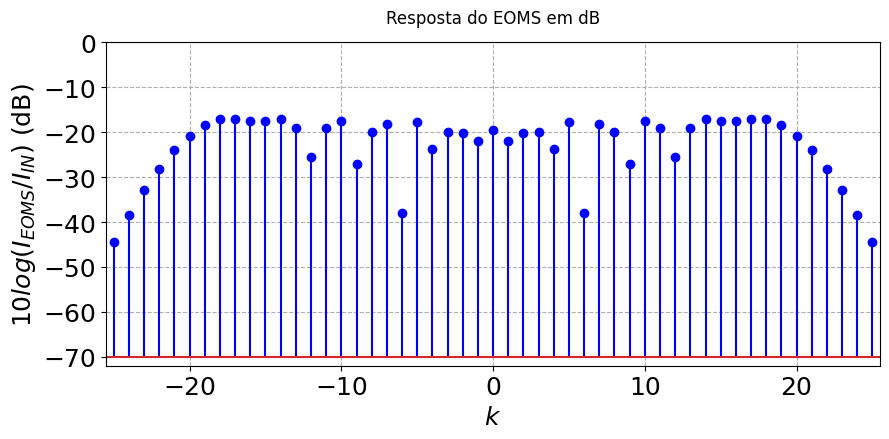

In [8]:
###############  PM - MZM------------------------------

up_2     = up_n
Vector_2 = Vector_pm
up_1     = up_m
Vector_1 = Vector_mz
# Aplica-se a função de produto de campos para obter o vetor resultante do sistema PM-MZM
(up_3, Matrix_cross3, Vector_EFre3, Vector_Ire3) = crossprod_efield(up_1, Vector_1, up_2, Vector_2)

# Aplica-se a função add_noise para colocar um ruido de referência
(ax_vector3,comb3,comb_dBm3)=add_noise(up_3, Vector_Ire3, noise)

# Aplica-se a função reduzir vector para ajustar ao dominio de outros pentes obtidos
up_act = up_3
up_new = 67
(ax_new3, new_vcomb3) = reduct_vector(up_act, comb3, up_new)
(ax_new3, new_vcomb_dB3) = reduct_vector(up_act, comb_dBm3, up_new)

# Plotar pente óptico
sistem3  = 'EOMS' #PM-MZM
name_x   = 'k'
sup_eoms  =  0
lat_eoms  = 25
ploting_sl2(ax_new3,name_x,new_vcomb_dB3,sistem3, sup_eoms, lat_eoms)


In [9]:
# Pente do PM-MZM a ser analisado
vec_SL = new_vcomb3  # Vetor de intensidade em mW
eN     = 21          # Numero de SLs a ser analisadas
analise_SD_AV(vec_SL, eN)


Tamanho do vector de saida do EOM : 67
eN = 21
SD = 0.0057
AV = 20.5602
